In [1]:
import numpy as np
import ROOT as rt
rt.gStyle.SetOptStat(0)

Welcome to JupyROOT 6.14/02


In [2]:
"""samples.npy  testset_codes.npy  testset_imgs.npy  testset_recons.npy"""
samples  = np.load("samples.npy")
testimg  = np.load("testset_imgs.npy")
testreco = np.load("testset_recons.npy")
testcode = np.load("testset_codes.npy")
print samples.shape
print testimg.shape
print testreco.shape
print testcode.shape

(30, 64, 64, 1)
(30, 64, 64, 1)
(30, 64, 64, 1)
(30, 16, 16)


In [3]:
def make_hist_from_array( arr, hname ):
    h = rt.TH2D( hname, "", arr.shape[0], 0, arr.shape[0], arr.shape[1], 0, arr.shape[1] )
    for x in range( arr.shape[0] ):
        for y in range( arr.shape[1] ):
            val = arr[x,y]
            if arr[x,y]<0.1:
                val = 0.01
            h.SetBinContent( x+1, y+1, val)
    return h

In [4]:
def make_codehist_from_array( arr, hname ):
    h = rt.TH2I( hname, "", arr.shape[0], 0, arr.shape[0], arr.shape[1], 0, arr.shape[1] )
    for x in range( arr.shape[0] ):
        for y in range( arr.shape[1] ):
            val = arr[x,y]
            h.SetBinContent( x+1, y+1, val)
    return h

Warning in <TCanvas::Constructor>: Deleting canvas with same name: ctestcode
Warning in <TCanvas::Constructor>: Deleting canvas with same name: ctestimg


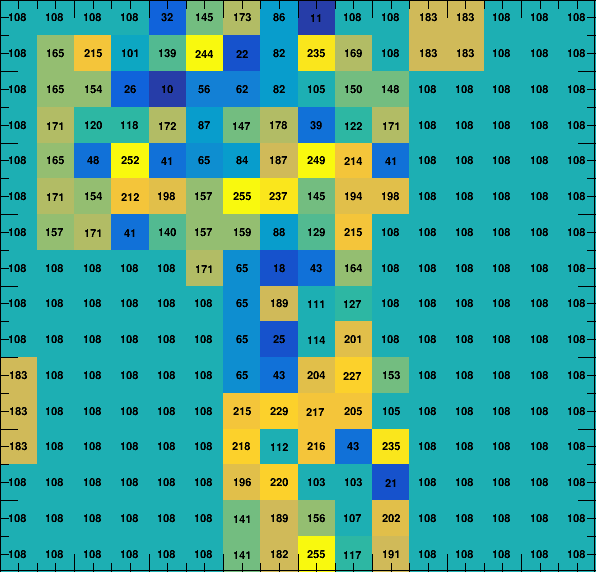

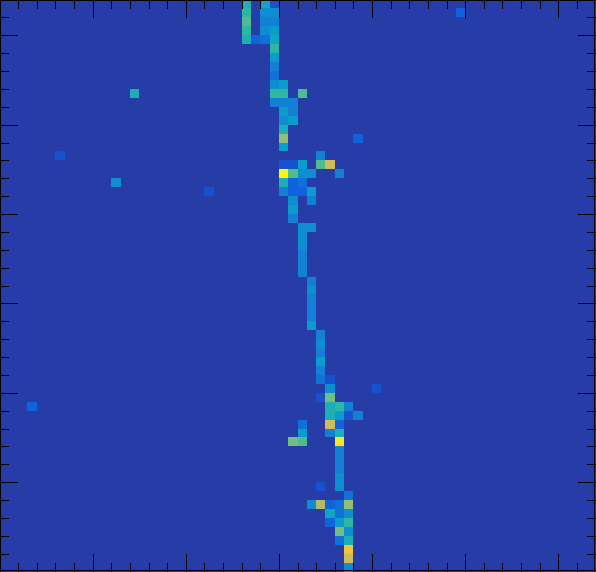

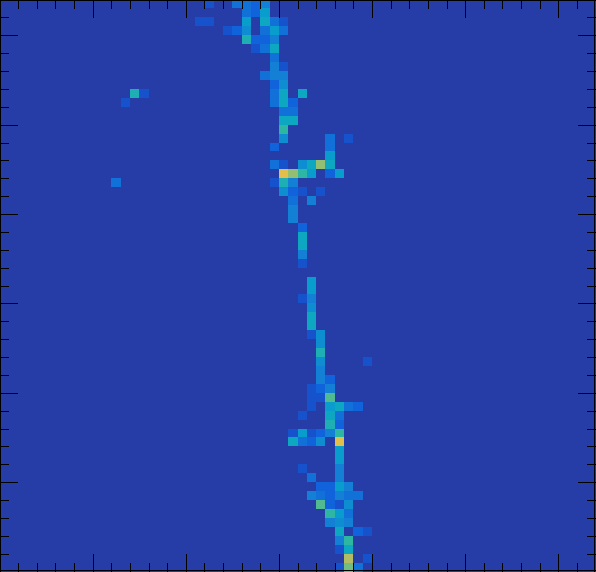

In [12]:
rt.gStyle.SetPadBottomMargin(0)
rt.gStyle.SetPadTopMargin(0)
rt.gStyle.SetPadLeftMargin(0)
rt.gStyle.SetPadRightMargin(0)
rt.gStyle.SetPadTickX(1);
rt.gStyle.SetPadTickY(1);
ctestcode = rt.TCanvas("ctestcode","ctestcode",600,600)
ctestcode.SetFrameFillColor(0);
ctestcode.SetFrameFillStyle(0);
ctestcode.SetFrameLineColor(0);
ctestcode.SetFrameBorderMode(0);  

ctestimg = rt.TCanvas("ctestimg","testimg",600,600)
ctestimg.SetFrameFillColor(0);
ctestimg.SetFrameFillStyle(0);
ctestimg.SetFrameLineColor(0);
ctestimg.SetFrameBorderMode(0);
#ctestcode.Divide(3,3);

ctestreco = rt.TCanvas("ctestreco","ctestreco",600,600)
ctestreco.SetFrameFillColor(0);
ctestreco.SetFrameFillStyle(0);
ctestreco.SetFrameLineColor(0);
ctestreco.SetFrameBorderMode(0);
#ctestcode.Divide(3,3);

filled = []
while len(filled)<1:
    p = np.random.randint(0,30)
    if p not in filled:
        filled.append(p)

htestcodelist = []
for n,i in enumerate(filled):
    #ctestcode.cd( 3*(n/3) + n%3 + 1 )
    ctestcode.cd()
    h = make_codehist_from_array( testcode[i,:,:], "testcode%d"%(i))
    h.Draw("textcol")
    h.GetZaxis().SetRangeUser(0,256)
    h.GetXaxis().SetLabelSize(0)
    h.GetYaxis().SetLabelSize(0)
    h.GetZaxis().SetLabelSize(0)
    htestcodelist.append(h)
    
    ctestimg.cd()
    himg = make_hist_from_array( testimg[i,:,:,0], "testimg%d"%(i))
    himg.Draw("col")
    himg.GetZaxis().SetRangeUser(0,10)
    himg.GetXaxis().SetLabelSize(0)
    himg.GetYaxis().SetLabelSize(0)
    himg.GetZaxis().SetLabelSize(0)
    htestcodelist.append(himg)
    
    ctestreco.cd()
    hreco = make_hist_from_array( testreco[i,:,:,0], "testreco%d"%(i))
    hreco.Draw("col")
    hreco.GetZaxis().SetRangeUser(0,10)
    hreco.GetXaxis().SetLabelSize(0)
    hreco.GetYaxis().SetLabelSize(0)
    hreco.GetZaxis().SetLabelSize(0)
    htestcodelist.append(hreco)
    
ctestcode.Draw()
ctestimg.Draw()
ctestreco.Draw()